In [1]:
import dlsfunctions as dls
import initialization_data as init
import numpy as np
import matplotlib.pyplot as plt

In [2]:
time = init.get_log_time()
#time2 = init.get_lin_time()
d = init.get_distance()

gamma = init.get_gamma()

mean = init.get_right_mean()

sigma = init.get_normal_sigma()

m = init.m
c = init.c
beta = init.beta

f = dls.generate_distribution(d, mean, sigma, c)
noise = np.random.normal(mean, sigma, 200)*1e7

In [3]:
theta_input = np.append(f, beta)

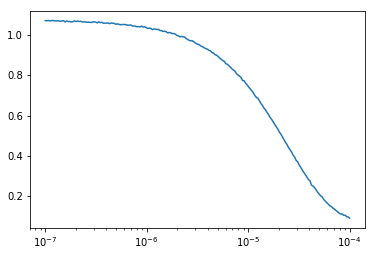

In [4]:
sim_data = dls.g2(theta_input, d, m, gamma, time) + noise
plt.semilogx(time, sim_data)


In [5]:
ndim = 21
nwalkers = 100
nsteps = 1000

In [6]:
start_pos = dls.create_start_pos(theta_input, ndim, nwalkers)
sampler = dls.create_sampler(nwalkers, ndim, d, sim_data, m, gamma, time)
result = dls.infer(sampler, start_pos, nsteps)
result.acceptance_fraction

array([0.355, 0.354, 0.325, 0.371, 0.368, 0.387, 0.375, 0.365, 0.379,
       0.349, 0.365, 0.344, 0.359, 0.359, 0.364, 0.333, 0.379, 0.352,
       0.365, 0.367, 0.369, 0.361, 0.394, 0.375, 0.366, 0.364, 0.381,
       0.374, 0.357, 0.367, 0.378, 0.365, 0.361, 0.362, 0.384, 0.372,
       0.357, 0.331, 0.388, 0.327, 0.354, 0.385, 0.34 , 0.38 , 0.367,
       0.396, 0.38 , 0.366, 0.346, 0.383, 0.386, 0.341, 0.382, 0.373,
       0.353, 0.361, 0.363, 0.38 , 0.367, 0.356, 0.377, 0.355, 0.345,
       0.386, 0.37 , 0.358, 0.36 , 0.373, 0.387, 0.371, 0.396, 0.365,
       0.366, 0.393, 0.358, 0.361, 0.345, 0.347, 0.369, 0.371, 0.37 ,
       0.382, 0.378, 0.359, 0.387, 0.347, 0.355, 0.356, 0.41 , 0.406,
       0.371, 0.357, 0.379, 0.364, 0.372, 0.372, 0.373, 0.367, 0.348,
       0.383])

/usr/local/lib/python2.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


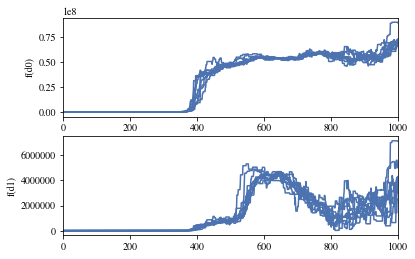

In [7]:
dls.view_burnin_plot(result, 0, 1)

In [8]:
chained_sampler = dls.chain(result, 850, ndim)
samples_df = dls.create_dataframe(chained_sampler, ndim)
q = samples_df.quantile([0.5], axis=0)
q

,f0,f1,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f2,f3,f4,f5,f6,f7,f8,f9
0.5,5.623526e+07,2.118904e+06,6.320117e+06,5.388421e+06,3.500690e+06,1.038147e+08,1.850944e+09,6.828358e+07,3.418694e+07,5.292090e+07,5.620789e+06,2.889275e+07,4.579208e+07,1.511395e+06,7.325783e+06,1.186177e+07,1.862381e+07,8.306030e+06,3.801467e+07,1.727325e+07


In [9]:
infer = np.zeros(20)
infer[0] = 5.623526e+07
infer[1] = 2.118904e+06
infer[2] = 4.579208e+07
infer[3] = 1.511395e+06
infer[4] = 7.325783e+06
infer[5] = 1.186177e+07
infer[6] = 1.862381e+07
infer[7] = 8.306030e+06
infer[8] = 3.801467e+07
infer[9] = 1.727325e+07
infer[10] = 6.320117e+06
infer[11] = 5.388421e+06
infer[12] = 3.500690e+06
infer[13] = 1.038147e+08
infer[14] = 1.850944e+09
infer[15] = 6.828358e+07
infer[16] = 3.418694e+07
infer[17] = 5.292090e+07
infer[18] = 5.620789e+06
infer[19] = 2.889275e+07

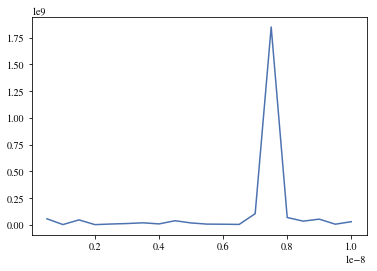

In [10]:
plt.plot(d, infer)

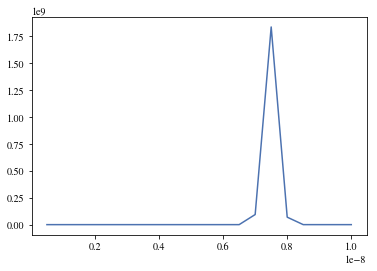

In [11]:
plt.plot(d, f)

In [12]:
beta_infer = dls.get_beta(chained_sampler, ndim)
beta_infer2 = beta_infer.quantile([0.5], axis=0).values.flatten()

In [13]:
beta_infer2

array([0.97852886])

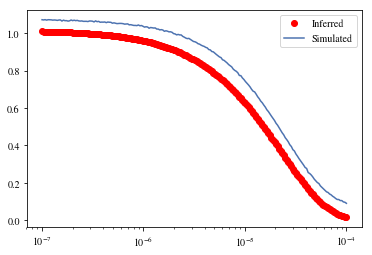

In [14]:
theta_infer = np.append(infer, beta_infer2)
g2_infer = dls.g2(theta_infer, d, m, gamma, time)
plt.semilogx(time, g2_infer, 'ro', label='Inferred')
plt.semilogx(time, sim_data, label='Simulated')
plt.legend()

(array([ 894.,  838., 1252., 2234., 2556., 2449., 2067., 1369.,  731.,
         610.]),
 array([1.63676142e-03, 2.01041089e-01, 4.00445416e-01, 5.99849743e-01,
        7.99254070e-01, 9.98658398e-01, 1.19806272e+00, 1.39746705e+00,
        1.59687138e+00, 1.79627571e+00, 1.99568003e+00]),
 <a list of 10 Patch objects>)

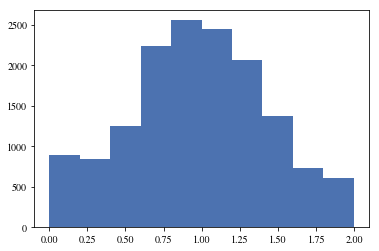

In [15]:
beta_posterior = beta_infer.values.flatten()
plt.hist(beta_posterior)